hipotesis_ regimenes de deformaciones pequeñas. Entonces el módulo dinámico es igual al estático.

Despreciamos las deformaciones trasversales



In [1]:
import matplotlib
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
import numpy as np
from scipy import fftpack
from scipy.signal import find_peaks  
import pandas as pd

In [2]:
def MakeSpectralPlot(y, Fs, fignum=1):
    
    yfft = fftpack.fft(y)
    N = len(y)
    xf = np.linspace(0, Fs/2, int(N/2))
    yf = 2.0/N * np.abs(yfft[:N//2])
    PosicionPicos, IntensidadPicos = find_peaks(yf, height=yf[0])
    print(PosicionPicos)
    print(IntensidadPicos)
#    VectorFrecuenciaPicos = [xf[i] for i in PosicionPicos]
    plt.figure(fignum)
    plt.clf()
    plt.semilogx(xf, yf)
    #plt.plot(xf,yf)
    plt.xlabel('Frecuencias (MHz)')
    plt.ylabel('Amplitud (AU)')
    plt.title('Descomposición espectral del ruido')
    #plt.xlim(1,10)
    return xf, yf


### Actividad 3.1

Calcular la transformada rápida de Fourier (FFT) de las siguientes funciones:

$v(t) = |cos(2 \pi f t)|$

$v(t) = |cos(2 \pi f t)| + 0.2$

$v(t) = |cos(2 \pi f t)| ^{2} + 0.2$

Para ello, deberán muestrear las funciones.
Evaluar el resultado del módulo de la FFT de acuerdo a distintas duraciones y
frecuencia de muestreo

In [3]:
#matplotlib.use('TkAgg')
%matplotlib qt
t = np.linspace(0, 10, 10000)
tstep = max(t)/len(t)
fsamp = 1/tstep

f0 = 45

V = np.abs(np.cos(2*np.pi*f0*t)) 

plt.figure(2)
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
plt.figure(figsize = (9, 7.5))
MakeSpectralPlot(V, fsamp)

f_ = np.array(plt.ginput(2))
print(f'Frecuencia: {f_[0][0]/2}')

[]
{'peak_heights': array([], dtype=float64)}
Frecuencia: 45.28205768426104


In [4]:
%matplotlib qt

t = np.linspace(0, 10, 10000)
tstep = max(t)/len(t)
fsamp = 1/tstep

f0 = 45

V = np.abs(np.cos(2*np.pi*f0*t)) + 0.2

plt.figure(2)
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
MakeSpectralPlot(V, fsamp)

f_ = np.array(plt.ginput(2))
print(f'Frecuencia: {f_[0][0]/2}')

[]
{'peak_heights': array([], dtype=float64)}
Frecuencia: 44.43477499543744


In [20]:
%matplotlib qt

t = np.linspace(0, 10, 10000)
tstep = max(t)/len(t)
fsamp = 1/tstep

f0 = 45

V = np.abs(np.cos(2*np.pi*f0*t))**2 + 0.2

plt.figure(2)
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
MakeSpectralPlot(V, fsamp)

f_ = np.array(plt.ginput(2))
print(f'Frecuencia: {f_[0][0]/2}')

[]
{'peak_heights': array([], dtype=float64)}
Frecuencia: 44.62167941086421


### Actividad 3.2

Generar una señal correspondiente a la vibración ideal sin amortiguamiento de
una barra en voladizo, considerando sus tres primero modos:

$ v(t) = A_{1} sin(\omega_1 t) + A_2 sin(\omega_2 t + \phi) + A_3 sin( \omega_3 t + \phi)$

$\omega_i = (\frac{\beta_i L}{L})^2 \sqrt{\frac{E I{zz}}{\rho A}}$

In [42]:
def w_i(betaL):
    r = 2 * 0.001 #m
    L = 240 * 0.001 #m
    E = 200 * 1e+9 #Pa
    rho = 7850 # kg/m3
    A = np.pi * r**2
    I = (np.pi * r**4 )/4
    
    w_i = (betaL/L)**2 * np.sqrt( (E * I) / (rho * A) )
    return w_i

betaL_i = [1.875, 4.694, 7.854]
w = []
for i,b in enumerate(betaL_i):
    w.append(w_i(b))
    print(f' La frecuencia del modo {i+1} es {w_i(b)/(2*np.pi)} Hz')


 La frecuencia del modo 1 es 49.03208506613794 Hz
 La frecuencia del modo 2 es 307.30101039454416 Hz
 La frecuencia del modo 3 es 860.3191925884017 Hz


In [88]:
%matplotlib qt
t = np.linspace(0, 30, 500000)
tstep = max(t)/len(t) 
fsamp = 1/tstep

A1 = 1
A2 = 1
A3 = 1
w1 = w[0]
w2 = w[1]
w3 = w[2]
phi = 0

V = A1 * np.sin(w1 *t) + A2 * np.sin(w2 *t + phi) + A3 * np.sin(w3 *t + phi)

plt.figure(2)
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
MakeSpectralPlot(V, fsamp)
#plt.xlim(0,1000)

f_ = np.array(plt.ginput(3))
print(w)
print(f'Frecuencias: w1: {f_[0][0] * 2 * np.pi}, w2: {f_[1][0] * 2 * np.pi} , w3: {f_[2][0] * 2 * np.pi} ')

[ 1471  9219 24190]
{'peak_heights': array([0.99990398, 0.92587096, 0.98608474])}
[308.0776764679375, 1930.829193392441, 5405.54491035605]
Frecuencias: w1: 4967.547575247302, w2: 1830.859580293084 , w3: 303.6536040427513 


### Actividad 3.3
Se presentan distintas capturas de series temporales realizadas con un osciloscopio
que permitía registrar series de datos de 30k puntos. Las series corresponden a la
oscilación vertical libre de una barra en voladizo. 3 de las series corresponden a una
barra de acero y 4 a una barra de latón

Analizar las series y obtener el valor del módulo de Young de cada material.
Discutir la calidad de los datos al compararlos con una serie temporal ideal con
amortiguamiento:

http://materias.df.uba.ar/l4a2021c1/files/2021/03/actividades_clase_03.pdf


$v_i (x_p , t) = A_p e^{\zeta \omega_i T} sin(\omega_{i,d} t + \phi)$

$\delta = \tau \omega_i T = ln(\frac{v_i(x,t)}{v_i(x,t+T)})$

$\omega_{i,d} = \omega_i \sqrt{1 - \zeta^2} \Leftarrow \zeta = \frac{\delta}{\omega_i T}$

#### CASO IDEAL

In [110]:
def w_id(damp,w_i):
    w_ = w_i * np.sqrt(1-damp)
    return w_ 
damp = 0.6
print(w_id(damp,w1) , w_id(damp,w2) , w_id(damp,w3) )
print(w)

194.8454307782281 1221.1636047731695 3418.766782211165
[308.0776764679375, 1930.829193392441, 5405.54491035605]


In [71]:
t = np.linspace(0, 30, 500000)
tstep = max(t)/len(t) 
fsamp = 1/tstep

A1 = 1
A2 = 1
A3 = 1
w1 = w[0]
w2 = w[1]
w3 = w[2]
phi = 0

V = A1 * np.sin(w1 *t) + A2 * np.sin(w2 *t + phi) + A3 * np.sin(w3 *t + phi)

plt.figure(2)
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
MakeSpectralPlot(V, fsamp)
#plt.xlim(0,1000)

print(w)
f_ = np.array(plt.ginput(3))

print(f'Frecuencias: w1: {f_[0][0] * 2 * np.pi}, w2: {f_[1][0] * 2 * np.pi} , w3: {f_[2][0] * 2 * np.pi} ')

[ 1471  9219 25810]
{'peak_heights': array([0.99805263, 0.99610052, 0.78676857])}
[308.0776764679375, 1930.829193392441, 5405.54491035605]
Frecuencias: w1: 5194.107503719701, w2: 1949.247814885959 , w3: 310.30215001476427 


306.5334177385956 1921.1507906241873 5378.4492765199


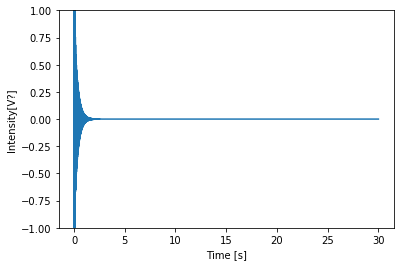

In [111]:
%matplotlib inline
t = np.linspace(0, 30, 1000000)
tstep = max(t)/len(t) 
fsamp = 1/tstep

A1 = 1
A2 = 1
A3 = 1
w1 = w[0]
w2 = w[1]
w3 = w[2]
phi = 0
def T(w):
    T_ = 2 * np.pi / w
    return T_
damp = 0.01
V =  A1 * np.sin( w_id(damp,w1) *t) * np.exp(-damp * t * w1) + A2 * np.sin(w_id(damp,w2) *t + phi) * np.exp(-damp * t * w2)+ A3 * np.sin(w_id(damp,w3) *t + phi)  * np.exp(-damp * t * w3) 

plt.figure(2)
plt.clf()
plt.plot(t, V)
#plt.xlim(0,10)
plt.ylim(-1,1)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
#MakeSpectralPlot(V, fsamp)


print(w_id(damp,w1) , w_id(damp,w2) , w_id(damp,w3) )
#f_ = np.array(plt.ginput(3))
#print(f'Frecuencias: w1: {f_[0][0] * 2 * np.pi}, w2: {f_[1][0] * 2 * np.pi} , w3: {f_[2][0] * 2 * np.pi} ')

#### CASO REAL

In [7]:
import os
import re 

files = {os.path.splitext(k)[0]: {} for k in os.listdir('data') if 'acero' in os.path.splitext(k)[0] or 'laton' in os.path.splitext(k)[0]}


for i,file in enumerate(os.listdir('data')):
    name = os.path.splitext(file)[0]
    if 'acero' in name or 'laton' in name:
        f = open(f'data/{file}').read().split()[7:]
        t = [float(f[i]) for i in range(0,len(f),2)]
        v = [float(f[i + 1]) for i in range(0,len(f),2)]
        files[name]['t'] = np.array(t)
        files[name]['v'] = np.array(v)

  

In [9]:
t = files['acero_3']['t'][1000:]
v = files['acero_3']['v'][1000:]

# arreglo un poco
v = v - np.median(v) #corro el 0
t= np.linspace(0, len(t)/100, len(t))

Text(0, 0.5, 'Signal [V]')

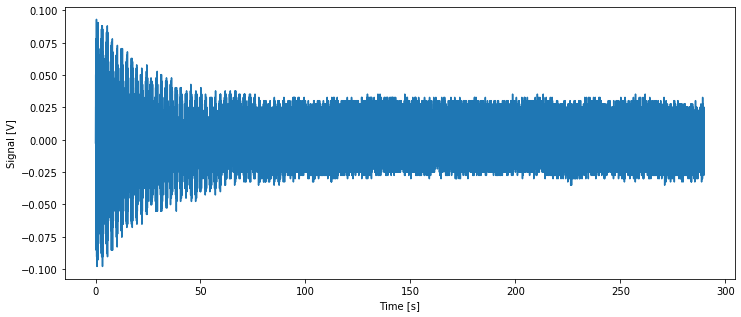

In [10]:
%matplotlib inline
from scipy.signal import find_peaks
plt.figure(figsize = (12,5))
plt.clf()
plt.plot(t,v)
plt.xlabel("Time [s]")
plt.ylabel("Signal [V]")



[0.00138    0.00246    0.00306    0.00363    0.00855001 0.00912001
 0.00969001 0.01023001 0.01575002 0.01629002 0.01686002 0.01746002
 0.02298002 0.02349002 0.02406002 0.03072003 0.03126003 0.03675004
 0.03732004 0.03786004 0.03846004 0.04449004 0.04455004 0.04506005
 0.04560005 0.05112005 0.05166005 0.05172005 0.05223005 0.05286005
 0.05832006 0.05883006 0.05943006]
0.00108000108000108
corto
0.0006000006000006003
cumplio
0.0005700005700005699
cumplio
0.00492000492000492
corto
0.0005700005700005704
cumplio
0.0005700005700005704
cumplio
0.0005400005400005396
cumplio
0.005520005520005519
corto
0.0005400005400005396
cumplio
0.0005700005700005721
cumplio
0.0006000006000005977
cumplio
0.005520005520005523
corto
0.0005100005100005106
cumplio
0.0005700005700005686
cumplio
0.00666000666000666
corto
0.0005400005400005396
cumplio
0.005490005490005494
corto
0.0005700005700005686
cumplio
0.0005400005400005362
cumplio
0.0006000006000006011
cumplio
0.00603000603000603
corto
6.000006000006497e-05
cum

IndexError: index 33 is out of bounds for axis 0 with size 33

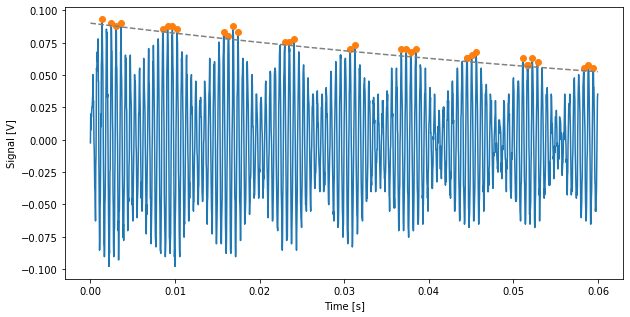

In [152]:
%matplotlib inline
f = 0.09 * np.exp(-9 * t[0:2000])
peaks, _ = find_peaks(v[0:2000], height = f)

plt.figure(figsize = (10,5))
plt.plot(t[0:2000],v[0:2000])
plt.plot(t[peaks], v[peaks], "o")
plt.plot(t[0:2000], f, '--',color = 'grey')
plt.xlabel("Time [s]")
plt.ylabel("Signal [V]")


def delta(peaks):
    maximos = []
    puntos = []
    print(t[peaks])
    for i,p in enumerate(peaks):
        print(t[peaks[i+1]] - t[p])
        if (t[peaks[i+1]] - t[p]) < 0.001:
            print("cumplio")
            puntos.append(p)
        else:
            print("corto")
            maximos.append(np.mean(puntos))
            puntos = []
    print(maximos)
    delta = np.log(np.mean(np.diff(maximos)))
    return delta

damp = delta(peaks)/np.sqrt(4 * np.pi + delta(peaks)**2)
print(f'delta es {delta} +- {np.std(np.log(np.diff(peaks)))} s')
print(f'damp es {damp}')

In [35]:
%matplotlib qt
fsamp = 1/0.001
MakeSpectralPlot(v, fsamp)
plt.ylim(0,0.025)
#plt.xlim(0.2,10)

f_ = np.array(plt.ginput(2))
print(f'Frecuencia: {np.median([f_[0][0] ,f_[1][0] ])}')

[    1     5     8    10    12  1427  1431  1435  1451  1524  1528  1530
  1535  1537  1539  1542  1547  1551  1555  1562  1575  1589  1592  1594
  1597  1600  1602  1605  1607  1610  1613  1617  1623  3889  4209  4291
  4353  6939  7233  7235  7237  7255 10136 10139 10156 10158 13038 13040
 13058 13060 13878]
{'peak_heights': array([0.00208573, 0.00056833, 0.00053145, 0.00049643, 0.00056023,
       0.00030469, 0.00029703, 0.00030998, 0.02191232, 0.00026984,
       0.0002711 , 0.0002892 , 0.0003376 , 0.00035785, 0.00039647,
       0.0003971 , 0.00049088, 0.00059543, 0.00069252, 0.00112213,
       0.00683904, 0.00072161, 0.00065272, 0.00061302, 0.00049508,
       0.00042626, 0.00038815, 0.00036845, 0.00037008, 0.00033972,
       0.00032233, 0.00027502, 0.00029696, 0.00027554, 0.00033468,
       0.00029768, 0.00142215, 0.00087064, 0.00090283, 0.00087929,
       0.00081001, 0.00142272, 0.0004534 , 0.00041392, 0.00056082,
       0.00060426, 0.00103112, 0.00092331, 0.00095134, 0.00109293,
 

In [29]:
t[1]

0.001000100010001